<center>Universidade Estadual Paulista - UNESP</center>
<center>Faculdade de Engenharia de Ilha Solteira - FEIS</center>
<center>Departamento de Engenharia Mecânica - DEM</center>
<center>Programa de Pós-Graduação em Engenharia Mecânica - PPGEM</center>
<br>
<center><b>Disciplina: Dinâmica dos Sistemas Mecânicos</b></center>
<center><b>Pêndulo Simples parametrizado por x e y via Equações de Voronec</b></center>
<br>
<center><b>Docente:</b> Samuel da Silva</center>
<center><b>Discentes:</b> Estevão Fuzaro de Almeida</center>
<center>Henrique Cordeiro Novais</center>

---

In [1]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
from scipy.integrate import odeint
import matplotlib.font_manager as font_manager
from matplotlib import rc
from sympy import symbols, latex

# Setar fontes em LaTeX para os plots
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'],'size': '18'})
rc('text', usetex=True)

### **1. Parametrizando por $x$ e $y$ via equações de Voronec.**

Vamos considerar um pêndulo simples com comprimento $L$ e massa $m$ sofrendo a ação de um campo gravitacional $g=9,8 \textrm~{m/s}^2$.

<center><img src="imgs/pendulo.png" alt="pendulo" width="290" height="341"/></center>

* A energia **cinética** é dada por:
$$ T(\dot{x},\dot{y}) = \frac{1}{2}m \dot x ^2+ \frac{1}{2}m \dot y^2 $$

* Já a energia **potencial** é dada por:
$$ V(y) = -mgy $$

* Assim, a **Lagrangiana** é:
$$
\mathcal{L}=\frac{1}{2}m\left(\dot{x}^{2}+\dot{y}^{2}\right) + mgy
$$

* A vinculação é do tipo **holônoma**, tal que:

$$ f(x,y) = x^2 + y^2 - L^2 = 0 $$


* Definindo as **variáveis de configuração** do pêndulo:

$$q_1 = x \\
q_2 = y$$

* Definindo alguns **parâmetros** para a obtenção dos coeficiente do problema:

$$\begin{align}n &= 2~\text{(fixo)} \rightarrow \text{var. de configuração} \\
m &= 1~(\text{fixo}) \rightarrow \text{velocidades independentes}\\
k &= n - m = 1~(\text{fixo})\\
l &= (1~\text{até}~k) = (1,1)\\
j &= (1~\text{até}~m)= (1,1)\\
\nu &= (1~\text{até}~k) = (1,1)\end{align}$$

* Obtendo-se os termos de vínculo $a_{lj}$:

$$\dot{q}_{m+l} - \sum_{j=1}^{m} a_{lj} \dot{q}_j = 0,~l=1,\cdots,k$$

$$\dot{q}_{2} - a_{11}\dot{q}_1 = 0 \Rightarrow \dot{y} - a_{11}\dot{x} = 0 ~~\therefore~{\boxed{a_{11} = \frac{\dot{y}}{\dot{x}} }}$$

* Obtendo-se a **Lagrangiana reduzida**:

A partir da equação de vínculo podemos obter as respectivas diferenciações:
$$ f(x,y) = x^2 + y^2 - L^2 = 0 \\
\frac{d}{dt}f(x,y) = \frac{d}{dt}(x^2 + y^2 - L^2) = 0 \\
\frac{d}{dt}f(x,y) = 2x\dot{x} + 2y\dot{y} = 0 \Rightarrow \dot{y} = -\left(\frac{x}{y}\right)\dot{x}$$

Por fim, após isolar $\dot{y}$, substituímos na Lagrangiana original obtendo a Lagrangiana reduzida:
$$ \bar{\mathcal L} = \frac{1}{2}m\left\{\dot{x}^{2}+\left[-\left(\frac{x}{y}\right)\dot{x}\right]^{2}\right\} + mgy$$

* Assim, podemos finalmente obter as **Equações de Voronec**, conforme segue:
$$
\frac{d}{d t}\left(\frac{\partial \bar{\mathcal L}}{\partial \dot{q}_{i}}\right)-\frac{\partial \bar{\mathcal L}}{\partial q_{i}}=\sum_{\nu=1}^{k} \frac{\partial \bar{\mathcal L}}{\partial q_{m+\nu}} a_{\nu i}+ \cancel{\sum_{\nu=1}^{k} \sum_{j=1}^{m} \frac{\partial \mathcal{L}}{\partial \dot{q}_{m+\nu}} b_{i j}^{\nu} \dot{q}_{j}}^{~~0\text{ (holônomo)}}, i=1, \ldots, m
$$

$$
\cancel{b_{ij}^{\nu}=\frac{\partial a_{\nu i}}{\partial q_{j}}-\frac{\partial a_{\nu j}}{\partial q_{i}}+\sum_{\mu=1}^{k}\left(\frac{\partial a_{\nu i}}{\partial q_{m+\mu}} a_{\mu j}-\frac{\partial a_{\nu j}}{\partial q_{m+\mu}} a_{\mu i}\right)}^{~~0\text{ (holônomo)}}
$$

$$
\frac{d}{d t}\left(\frac{\partial \bar{\mathcal L}}{\partial \dot{q}_{1}}\right)-\frac{\partial \bar{\mathcal L}}{\partial q_{1}}=\frac{\partial \bar{\mathcal L}}{\partial q_{2}} a_{11}
$$

$$
\boxed{\frac{d}{d t}\left(\frac{\partial \bar{\mathcal L}}{\partial \dot{x}}\right)-\frac{\partial \bar{\mathcal L}}{\partial x}=\frac{\partial \bar{\mathcal L}}{\partial y} a_{11}}
$$

In [2]:
# Definindo as variáveis do problema
t, l, m, g = smp.symbols('t, l, m, g', real=True) # Tempo "t", Comprimento "l", Massa "m", Gravidade "g"
x, y = smp.symbols('x, y', cls=smp.Function) # x e y -> Coordenadas não-generalizadas

In [3]:
# Deslocamentos
x = x(t)
y = y(t)

# Velocidades
xdot = smp.diff(x,t)
ydot = smp.diff(y,t)

# Acelerações
xddot = smp.diff(xdot,t)
yddot = smp.diff(ydot,t)

In [4]:
# Vínculo holônomo
f1 = x**2 + y**2 - l**2
f1_dot = smp.diff(f1,t)
f1_ddot = smp.diff(f1_dot,t)

In [5]:
ydot_ = smp.solve(f1_dot,ydot)[0]
ydot_

-x(t)*Derivative(x(t), t)/y(t)

In [6]:
# Energia cinética
T = (1/2)*m*(xdot**2 + ydot_**2)
# Energia potencial
V = -m*g*y
# Lagrangiana reduzida
L_bar = T - V
L_bar

g*m*y(t) + 0.5*m*(x(t)**2*Derivative(x(t), t)**2/y(t)**2 + Derivative(x(t), t)**2)

In [7]:
# Termo de vínculo alj
a11 = ydot_/xdot
a11

-x(t)/y(t)

In [8]:
# Voronec
voronec = smp.diff(smp.diff(L_bar,xdot),t) - smp.diff(L_bar,x) - smp.diff(L_bar,y)*a11
voronec = smp.simplify(voronec)
voronec

1.0*m*(1.0*g*x(t)*y(t)**3 - 1.0*x(t)**3*Derivative(x(t), t)**2 + 1.0*x(t)**2*y(t)**2*Derivative(x(t), (t, 2)) - 2.0*x(t)**2*y(t)*Derivative(x(t), t)*Derivative(y(t), t) + 1.0*x(t)*y(t)**2*Derivative(x(t), t)**2 + 1.0*y(t)**4*Derivative(x(t), (t, 2)))/y(t)**4

In [9]:
xddot_ = smp.simplify(smp.solve(voronec,xddot)[0])
xddot_

-(g*y(t)**3 - x(t)**2*Derivative(x(t), t)**2 - 2.0*x(t)*y(t)*Derivative(x(t), t)*Derivative(y(t), t) + y(t)**2*Derivative(x(t), t)**2)*x(t)/((x(t)**2 + y(t)**2)*y(t)**2)

In [10]:
yddot_ = smp.simplify(smp.solve(f1_ddot,yddot)[0])
yddot_

(-x(t)*Derivative(x(t), (t, 2)) - Derivative(x(t), t)**2 - Derivative(y(t), t)**2)/y(t)

In [11]:
yddot_.subs(xddot,xddot_)

(-Derivative(x(t), t)**2 - Derivative(y(t), t)**2 + (g*y(t)**3 - x(t)**2*Derivative(x(t), t)**2 - 2.0*x(t)*y(t)*Derivative(x(t), t)*Derivative(y(t), t) + y(t)**2*Derivative(x(t), t)**2)*x(t)**2/((x(t)**2 + y(t)**2)*y(t)**2))/y(t)

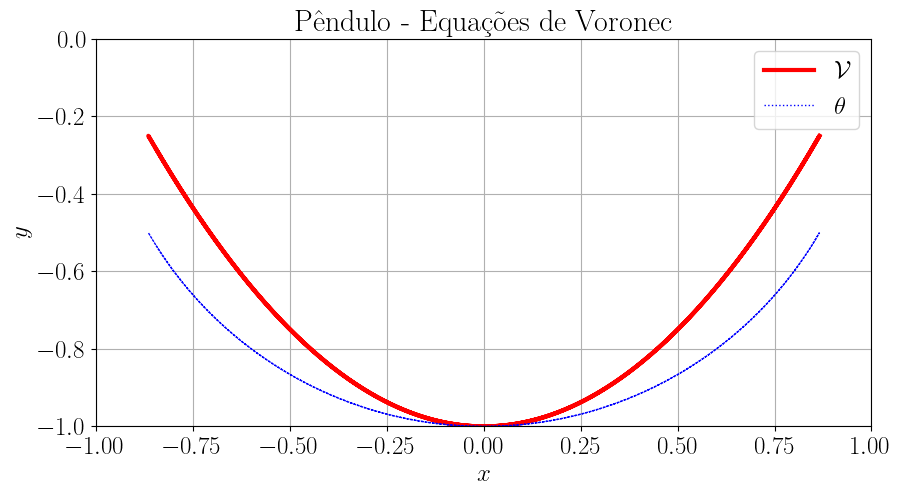

In [12]:
# Parâmetros do sistema
g = 9.81  # aceleração da gravidade
l = 1.0   # comprimento do pêndulo

# Intervalo de tempo para integração
t_start = 0.0
t_end = (g/l)**(1/2) # plotando um período
t_step = 0.001
t_span = np.arange(t_start, t_end, t_step)

## VORONEC --------------------------------------------------------
def pendulum_vor(z, t):
    z1 = z[0]   # x
    z2 = z[1]   # y
    z3 = z[2]   # xdot
    z4 = z[3]   # ydot
    dz1_dt = z3
    dz2_dt = z4
    dz3_dt = - (z1*(g*z2**3 - z1**2*z3**2 - 2*z1*z2*z3*z4 + z2**2*z3**2))/((z1**2 + z2**2)*z2**2)
    dz4_dt = (- z3**2 - z4**2 + (z1**2*(g*z2**3 - z1**2*z3**2 - 2*z1*z2*z3*z4 + z2**2*z3**2))/((z1**2 + z2**2)*z2**2))/(z2)
    return [dz1_dt, dz2_dt, dz3_dt, dz4_dt]

# Condições iniciais
z0 = [l*np.sin(np.pi/3), l*np.cos(np.pi/3), 0.0, 0.0]

# Resolvendo o sistema de equações diferenciais
solution = odeint(pendulum_vor, z0, t_span)

# Obtendo as soluções para z1, z2, z3 e z4
x_sol = solution[:, 0]
y_sol = (l**2 - x_sol**2)

## TRADICIONAL --------------------------------------------------------
def pendulum_an(z, t):
    z1 = z[0]
    z2 = z[1]
    dz1_dt = z2
    dz2_dt = -g/l*np.sin(z1)
    return [dz1_dt, dz2_dt]

# Condições iniciais
z0 = [np.pi/3, 0.0]  # z1(0), z2(0)

# Resolvendo o sistema de equações diferenciais
solution_an = odeint(pendulum_an, z0, t_span)

# Obtendo as soluções para z1, z2
x_sol_an = l*np.sin(solution_an[:, 0])
y_sol_an = l*np.cos(solution_an[:, 0])

# Plotando as soluções
plt.figure(figsize=(10, 8))
plt.plot(x_sol, -y_sol, linestyle='-', color='red', linewidth=3, label=r'$\mathcal{V}$')
plt.plot(x_sol_an, -y_sol_an, linestyle=':', color='blue', linewidth=1, label=r'$\theta$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Pêndulo - Equações de Voronec')
plt.legend()
plt.grid(True)
plt.xlim(-1.0,1.0)
plt.ylim(-1.0,0.0)
plt.axis()
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.show()